In [8]:
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
data = pd.read_csv("googleplaystore.csv")
from pylab import rcParams
import matplotlib.pyplot as plt
data.shape

(10841, 13)

In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092


# Remove lanes from dataset that contains some missing data

In [10]:
data.dropna(how='any',inplace = True)
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0


In [11]:
data.shape

(9360, 13)

In [12]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

# Analysis of Rating

Text(0.5, 1.0, 'Distribuition of Rating')

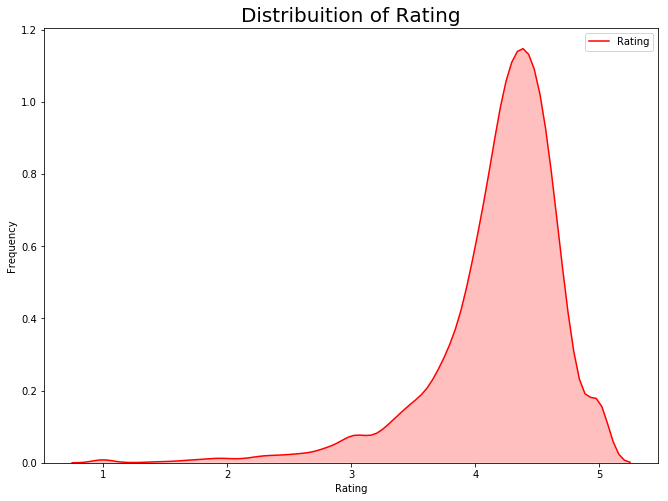

In [15]:
rcParams['figure.figsize'] = 11, 8
chart_distruibution = sns.kdeplot(data.Rating, color = "Red", shade = True)
chart_distruibution.set_xlabel("Rating")
chart_distruibution.set_ylabel("Frequency")
plt.title('Distribuition of Rating', size = 20)

Text(0.5, 1.0, 'App Categories ')

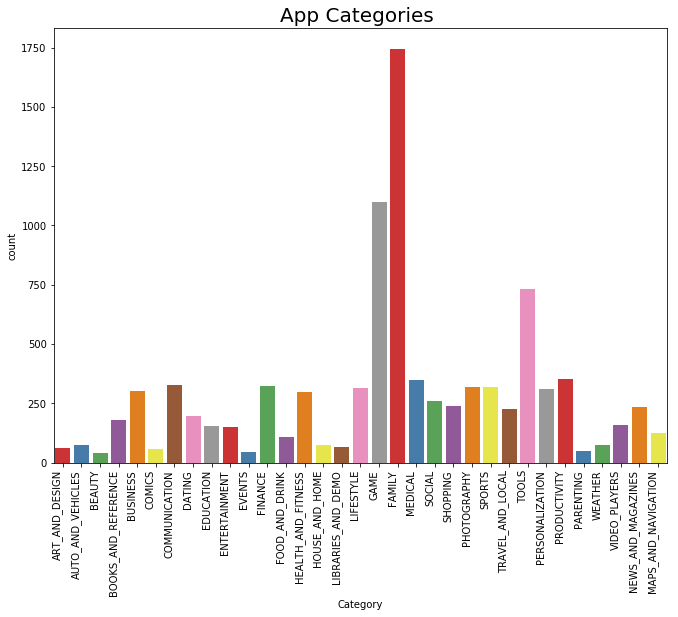

In [17]:
chart_of_categories = sns.countplot(x="Category",data=data,palette="Set1")
chart_of_categories.set_xticklabels(chart_of_categories.get_xticklabels(),rotation=90,ha="right")
chart_of_categories
plt.title("App Categories ", size=20)

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

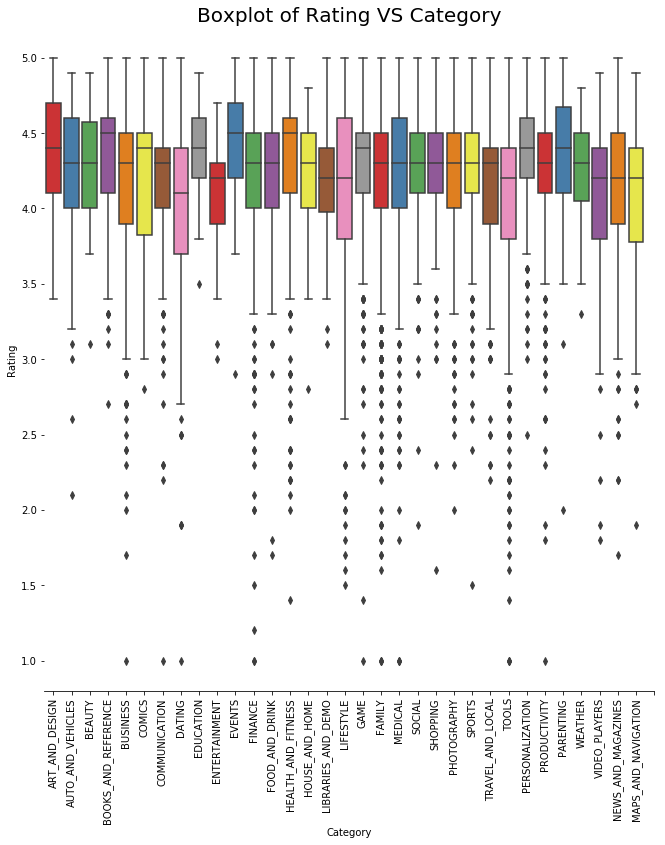

In [27]:
chart_box = sns.catplot(x="Category", y ="Rating", data=data, kind="box", height=10, palette="Set1")
chart_box.despine(left=True)
chart_box.set_xticklabels(rotation=90)
chart_box.set(xticks=range(0,34))
chart_box = chart_box.set_ylabels("Rating")
plt.title("Boxplot of Rating VS Category",size = 20)

Text(0.5, 1.0, 'Distribuition of review')

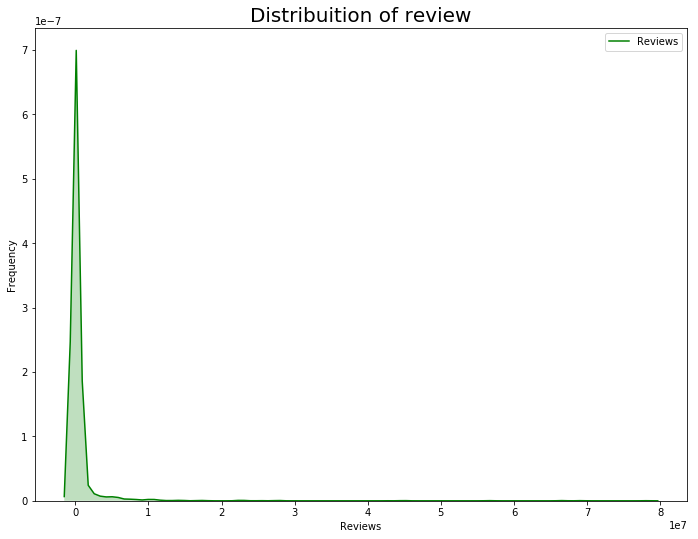

In [29]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
rcParams['figure.figsize'] = 11.7, 8.7
chart_of_distribuition2 = sns.kdeplot(data.Reviews, color = "Green", shade=True)
chart_of_distribuition2.set_xlabel("Reviews")
chart_of_distribuition2.set_ylabel("Frequency")
plt.title("Distribuition of review", size = 20)

In [33]:
data[data.Reviews > 5000000].count()

App               230
Category          230
Rating            230
Reviews           230
Size              230
Installs          230
Type              230
Price             230
Content Rating    230
Genres            230
Last Updated      230
Current Ver       230
Android Ver       230
dtype: int64

Text(0.5, 1.0, 'Rating vs Reviews')

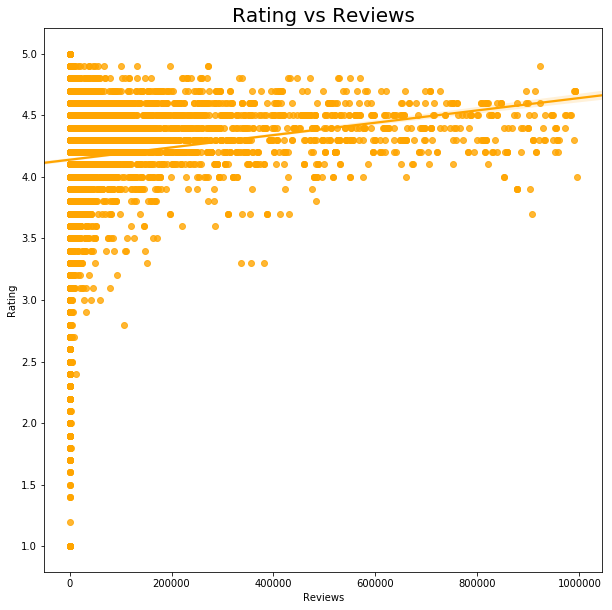

In [38]:
plt.figure(figsize=(10, 10))
sns.regplot(x="Reviews", y="Rating", color = "Orange", data=data[data["Reviews"]<1000000])
plt.title("Rating vs Reviews", size = 20)